# Code Notebook 3: Feature Selection and Engineering #

In this notebook, I will be engineering categorical features into a numeric scale when possible. I will examine correlations between features identified in Part 2 as promising predictors and use this information, combined with the observations from Part 2, to choose the best combinations of features for regression.  Any final pre-processing of those features, such as dropping or filling NaN values appropriately, dropping extreme outliers, or combining features in feature interactions, will complete the feature engineering process in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import graphtools as gt

In [2]:
train = pd.read_csv('../datasets/train_1.csv', keep_default_na=False, na_values='null')
test = pd.read_csv('../datasets/test_1.csv', keep_default_na=False, na_values='null')

## VIII. Converting Hierarchical Categorical Data to Numeric Scale ##

In this section, all categorical variables that have a clear heirarchy will be converted to a numeric scale.

In [3]:
train['exter_qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64

In [4]:
train['exter_cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64

In [5]:
train['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
NA     54
        1
Po      1
Name: bsmt_qual, dtype: int64

In [6]:
train['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
NA      54
Po       5
Ex       3
         1
Name: bsmt_cond, dtype: int64

In [7]:
train['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
NA      54
         4
Name: bsmt_exposure, dtype: int64

In [8]:
train['heating_qc'].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64

In [9]:
train['central_air'].value_counts()

Y    1910
N     141
Name: central_air, dtype: int64

In [10]:
train['kitchen_qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: kitchen_qual, dtype: int64

In [11]:
train['functional'].value_counts()

Typ     1915
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: functional, dtype: int64

In [12]:
train['fireplace_qu'].value_counts()

NA    1000
Gd     523
TA     407
Fa      59
Ex      31
Po      31
Name: fireplace_qu, dtype: int64

In [13]:
train['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      54
         1
Name: bsmtfin_type_1, dtype: int64

In [14]:
train['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
NA       54
BLQ      48
ALQ      35
GLQ      23
          2
Name: bsmtfin_type_2, dtype: int64

In [15]:
train['electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [16]:
train['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
NA     113
         1
Name: garage_finish, dtype: int64

In [17]:
train['garage_qual'].value_counts()

TA    1832
NA     113
Fa      82
Gd      18
Ex       3
Po       2
         1
Name: garage_qual, dtype: int64

In [18]:
train['garage_cond'].value_counts()

TA    1868
NA     113
Fa      47
Gd      12
Po       8
Ex       2
         1
Name: garage_cond, dtype: int64

In [19]:
train['paved_drive'].value_counts()

Y    1861
N     151
P      39
Name: paved_drive, dtype: int64

In [20]:
train['pool_qc'].value_counts()

NA    2042
Gd       4
Fa       2
TA       2
Ex       1
Name: pool_qc, dtype: int64

In [21]:
# Assigning categorical variables to be converted as appropriate.

rating_to_scaled = ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'heating_qc', 'kitchen_qual', 'fireplace_qu',
                   'garage_qual', 'garage_cond', 'pool_qc']
exposure_to_scaled = ['bsmt_exposure']
yes_no_to_binary = ['central_air']
functional_to_scaled = ['functional']
finish_to_scaled = ['bsmtfin_type_1', 'bsmtfin_type_2']
elec_to_scaled = ['electrical']
garfin_to_scaled = ['garage_finish']
paved_to_scaled = ['paved_drive']

In [22]:
def rating_to_scale(df, rating_cols, exposure_cols, yes_no_cols, fun_cols, fin_cols, elec_cols, garfin_cols, paved_cols):

    # Dictionaries for converting from categorical rating scales to numerical scales.
    
    rating_to_scale = {
        'NA' : 0,
        'Po' : 1,
        'Fa' : 2,
        'TA' : 3,
        'Gd' : 4,
        'Ex' : 5,
        ''   : np.nan
    }
    
    exposure_to_scale = {
        'NA' : np.nan,
        'No' : 0,
        'Mn' : 1,
        'Av' : 2,
        'Gd' : 3
    }
    
    yes_no_scale = {
        'Y' : 1,
        'N' : 0
    }
    
    fun_scale = {
        'Sal' : 0,
        'Sev' : 1,
        'Maj2' : 2,
        'Maj1' : 3,
        'Mod' : 4,
        'Min2' : 5,
        'Min1' : 6,
        'Typ' : 7
    }
    
    fin_scale = {
        '' : np.nan,
        'NA' : 0,
        'Unf' : 1,
        'LwQ' : 2,
        'Rec' : 3,
        'BLQ' : 4,
        'ALQ' : 5,
        'GLQ' : 6
    }
    
    elec_scale = {
        'Mix' : 1,
        'FuseP' : 2,
        'FuseF' : 3,
        'FuseA' : 4,
        'SBrkr' : 5
    }
    
    garfin_scale = {
        '' : np.nan,
        'NA' : 0,
        'Unf' : 1,
        'RFn' : 2,
        'Fin' : 3
    }
    
    paved_scale = {
        'N' : 0,
        'P' : 1,
        'Y' : 2
    }
    
    # These loops apply the above dictionaries to convert each categorical column as previously assigned.
    
    for col in rating_cols:
        df[col] = df[col].map(rating_to_scale)
        
    for col in exposure_cols:
        df[col] = df[col].map(exposure_to_scale)
    
    for col in yes_no_cols:
        df[col] = df[col].map(yes_no_scale)

    for col in fun_cols:
        df[col] = df[col].map(fun_scale)
        
    for col in fin_cols:
        df[col] = df[col].map(fin_scale)
        
    for col in elec_cols:
        df[col] = df[col].map(elec_scale)
        
    for col in garfin_cols:
        df[col] = df[col].map(garfin_scale)
        
    for col in paved_cols:
        df[col] = df[col].map(paved_scale)
        
    return df

In [23]:
# Apply the maps designed above to the train and test splits.

train = rating_to_scale(train, rating_to_scaled, exposure_to_scaled, yes_no_to_binary, functional_to_scaled,
                        finish_to_scaled, elec_to_scaled, garfin_to_scaled, paved_to_scaled)

test = rating_to_scale(test, rating_to_scaled, exposure_to_scaled, yes_no_to_binary, functional_to_scaled,
                       finish_to_scaled, elec_to_scaled, garfin_to_scaled, paved_to_scaled)

## IX. Correlated Features and Feature Interactions ##

In [24]:
corr = train.corr()

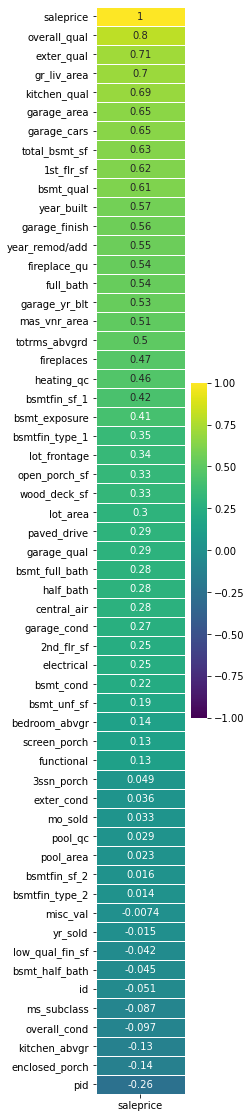

In [25]:
plt.figure(figsize=(2,20))
sns.heatmap(data=corr[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True, vmin=-1, vmax=1, cmap='viridis', linewidths=1);

Recreating the heatmap now that more features are encoded numerically.

In [26]:
bsmt_features = [col for col in train.columns if 'bsmt' in col]

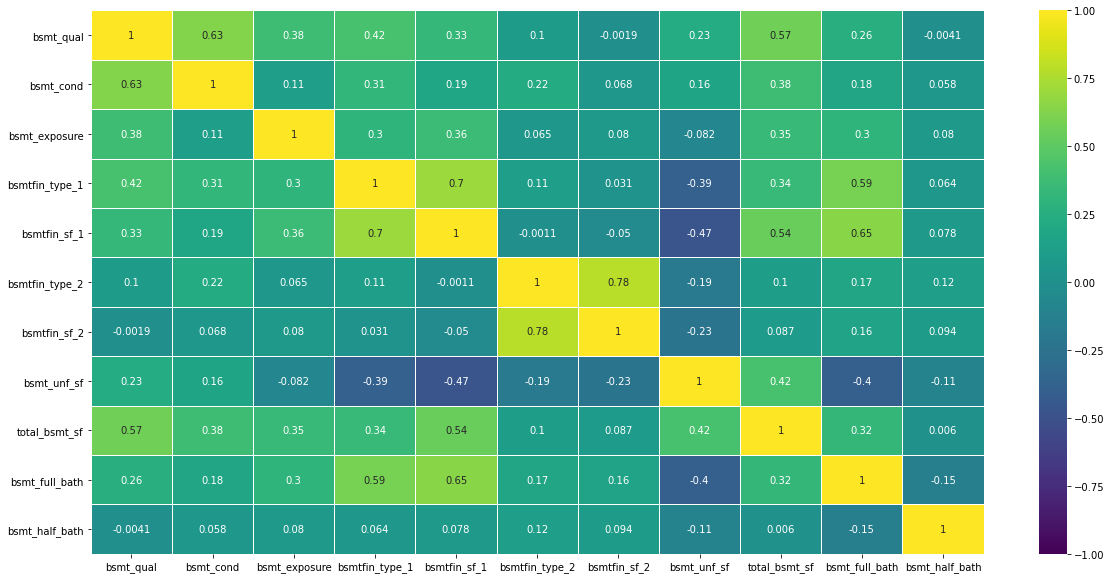

In [27]:
corr = train[bsmt_features].corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='viridis', linewidths=1);

There are a very large number of basement features, but the most promising tend to be correlated with each other.

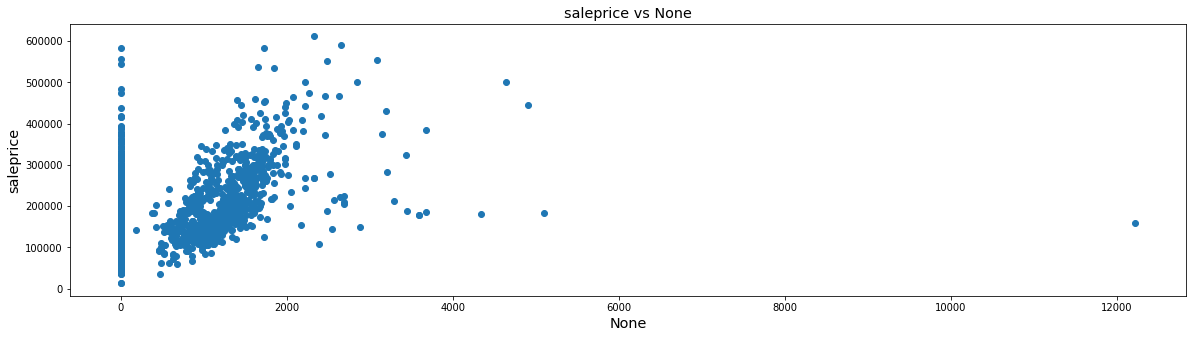

In [28]:
gt.quick_scatter(train['total_bsmt_sf']*train['bsmt_full_bath'],
                 train['saleprice'])

In [29]:
garage_features = [col for col in train.columns if 'gar' in col]

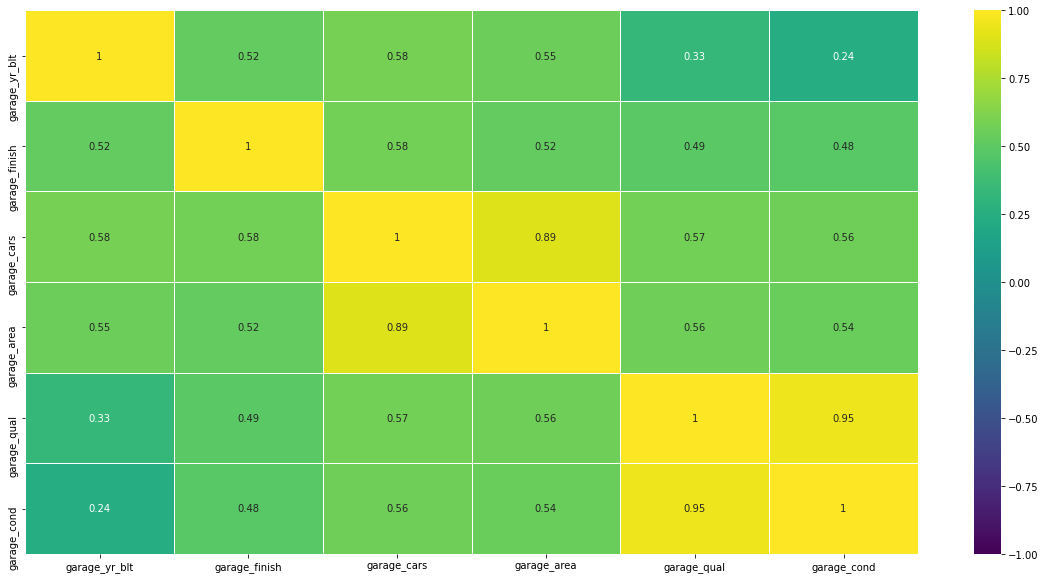

In [30]:
corr = train[garage_features].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='viridis', linewidths=1);

Nearly all garage features are significantly correlated with each other.  I should only use a few, ideally in a feature interaction.

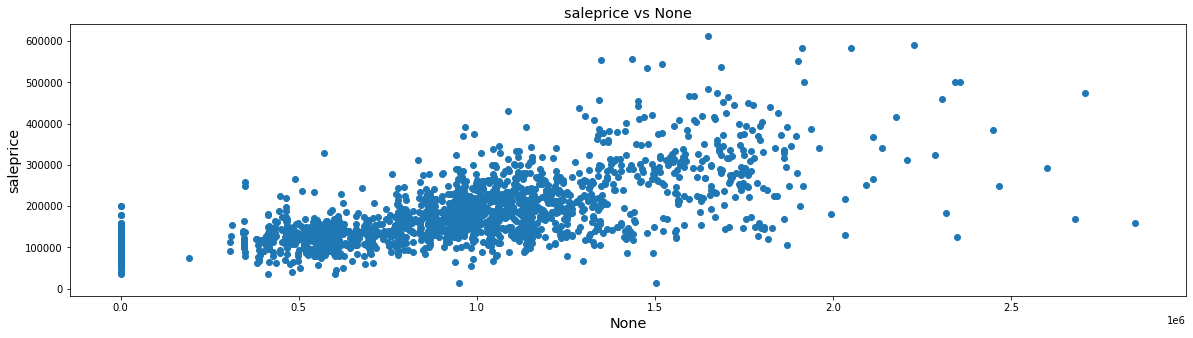

In [31]:
gt.quick_scatter(train['garage_yr_blt'].fillna(0)*train['garage_area'],
                 train['saleprice'])

This looks like an excellent combination of garage features.  It is also a nice solution of how to handle the garage_yr_blt feature when there is no garage.  It can now be encoded as 0.

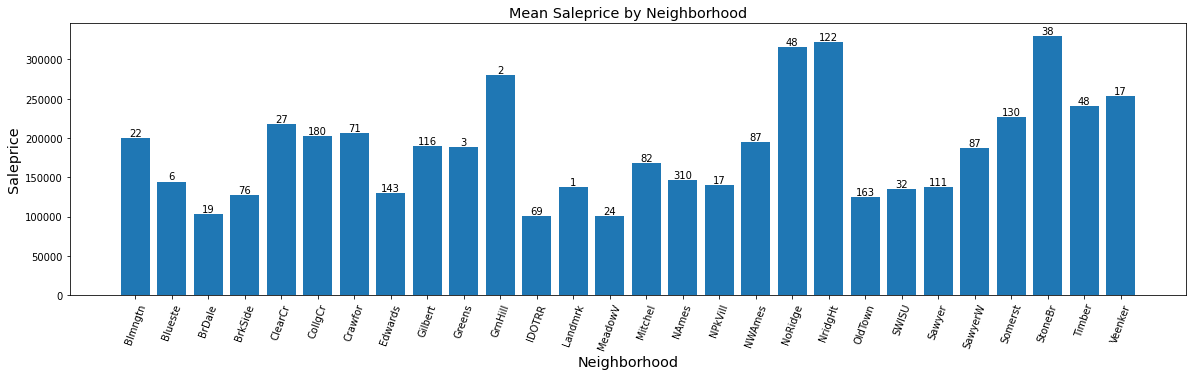

In [32]:
# See the documentation for .multi_bar_target_mean() in graphtools.py for references to resources I used for this graph.
price_by_neighborhood = train['saleprice'].groupby(train['neighborhood']).mean()
plt.figure(figsize=(20,5))
plot = plt.bar(price_by_neighborhood.index, price_by_neighborhood)
plt.xlabel('Neighborhood', fontsize='x-large')
plt.ylabel('Saleprice', fontsize='x-large')
plt.title(f'Mean Saleprice by Neighborhood', fontsize='x-large')
plt.xticks(rotation=70)
plt.bar_label(plot, train['neighborhood'].groupby(train['neighborhood']).size());

In [33]:
# Select neighborhoods with average saleprice at least one standard deviation above or below the mean average saleprice.
high_neighborhood_cutoff = price_by_neighborhood.mean() + price_by_neighborhood.std()
low_neighborhood_cutoff = price_by_neighborhood.mean() - price_by_neighborhood.std()
expensive_neighborhoods = price_by_neighborhood[price_by_neighborhood > high_neighborhood_cutoff]
cheap_neighborhoods = price_by_neighborhood[price_by_neighborhood < low_neighborhood_cutoff]

In [34]:
print(expensive_neighborhoods)
print(cheap_neighborhoods)

neighborhood
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: saleprice, dtype: float64
neighborhood
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: saleprice, dtype: float64


Neighborhood looks like a very strong detmining factor for price with a nice distribution of houses across neighborhoods.  I previously tried OneHotEncoding this feature, but it was detrimental to my model.  I am now going to create 3 bins for neighborhoods with low, tyical, or high mean saleprices.

In [35]:
# A list of the most promising overall size-related features from EDA.
size_features = ['1st_flr_sf', 'gr_liv_area', 'lot_area', 'totrms_abvgrd', 'full_bath', 'half_bath']

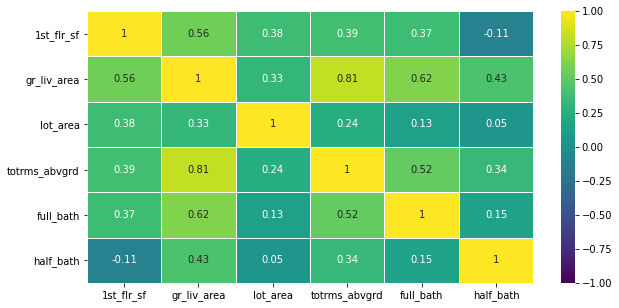

In [36]:
corr = train[size_features].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='viridis', linewidths=1);

gr_liv_area, half_bath, and lot_area seems like a good combination.

In [37]:
# A list of the most promising age-related features from EDA.
size_features = ['year_built', 'year_remod/add']

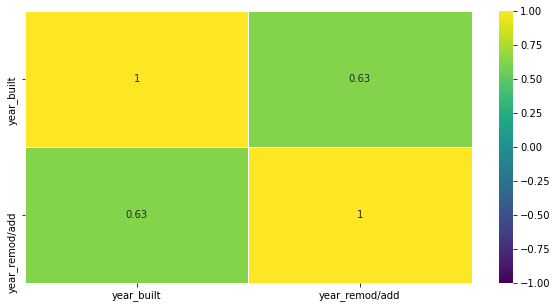

In [38]:
corr = train[size_features].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='viridis', linewidths=1);

Probably best to stick with one of these.

In [39]:
# A licolumnshe most promising quality-related features from EDA.
quality_features = ['overall_qual', 'exter_qual', 'kitchen_qual', 'fireplace_qu', 'heating_qc']

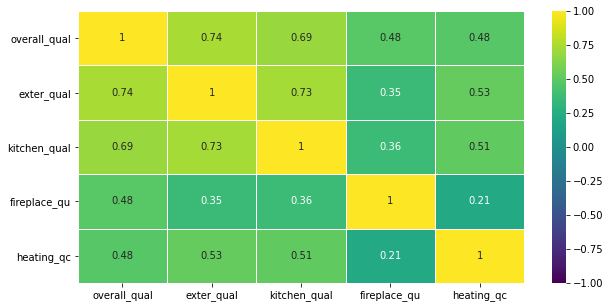

In [40]:
corr = train[quality_features].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='viridis', linewidths=1);

Many of these are correalated.  I'll try overall_qual, fireplace_qu, and heating_qc

In [41]:
keep_features = ['saleprice', 'id',                                 # REQUIRED
                 'total_bsmt_sf', 'bsmt_full_bath',                 # BASEMENT
                 'garage_yr_blt', 'garage_area',                    # GARAGE
                 'half_bath', 'gr_liv_area', 'lot_area',            # OVERALL SIZE                 
                 'neighborhood',                                    # LOCATION
                 'overall_qual', 'fireplace_qu', 'heating_qc',      # QUALITY
                 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
                         '3ssn_porch', 'screen_porch',              # PORCH
                 'mas_vnr_area',                                    # MASONRY VENEER
                 'year_built'                                       # AGE
                ]

In [42]:
# List of features in keep_features that need to be dummified.
# dummy_features = ['mas_vnr_type']

Every time I OneHotEncoded something it went poorly, so I finally didn't use anything I could convert to a numerical scale.

## X. Removing Outliers ##

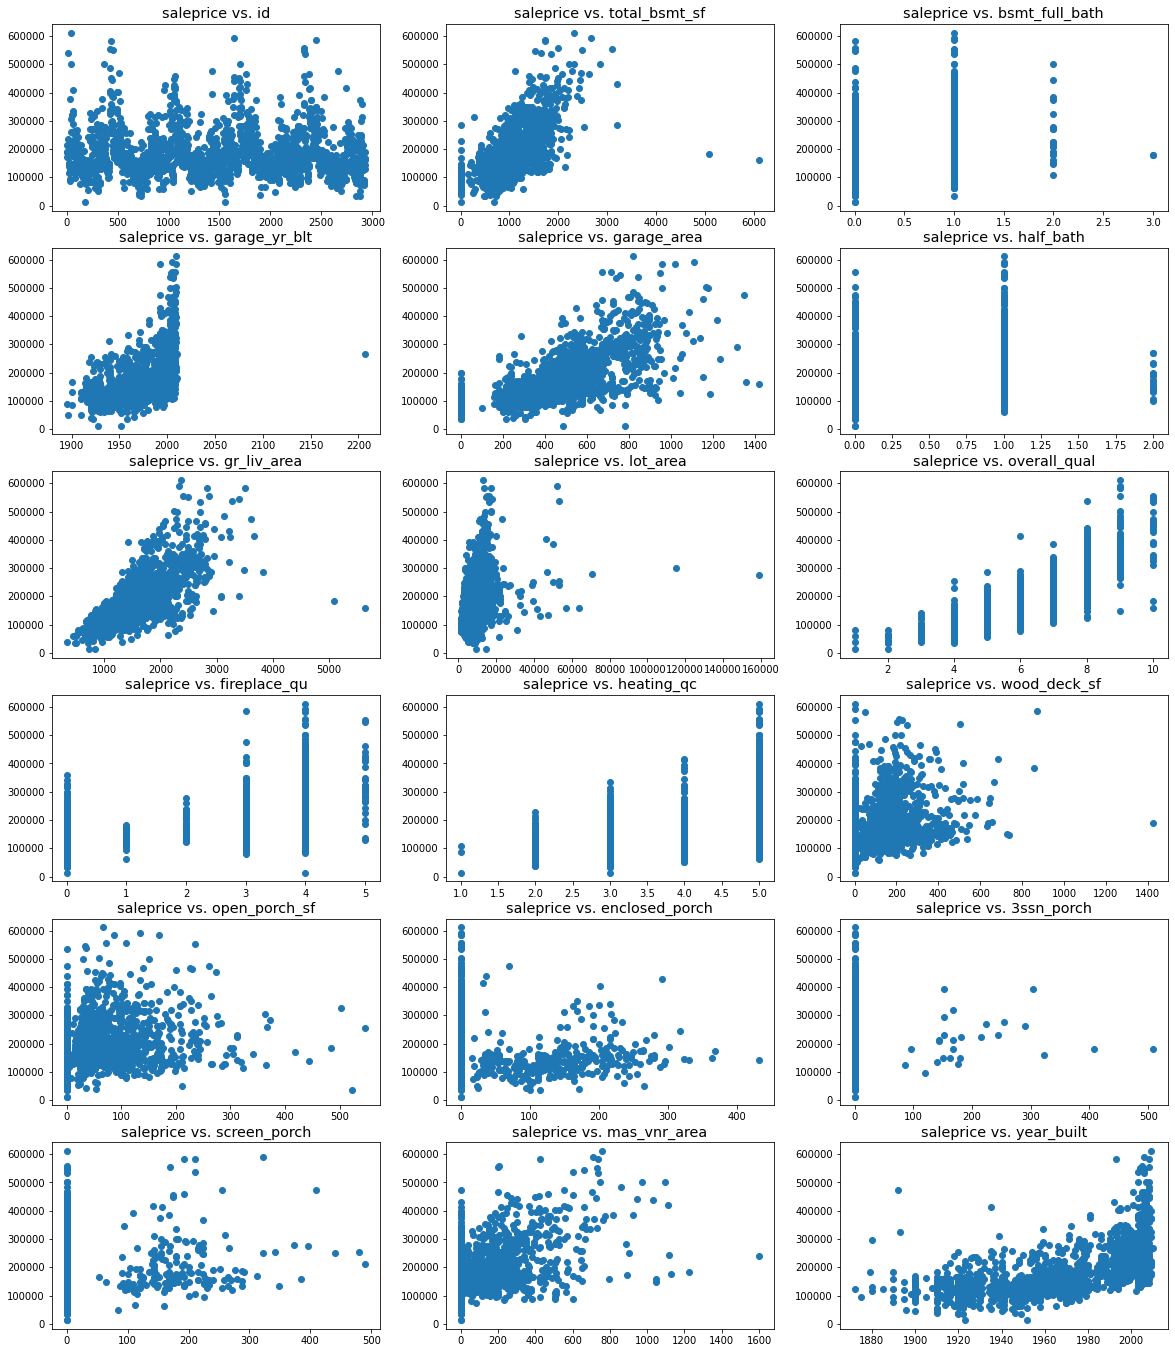

In [43]:
# This custom function graphs scatterplots of all numeric columns in a dataframe vs. one selected column.
gt.multi_scatter(train[keep_features], 'saleprice', 3, 20)

Collecting a list of indices of rows with extreme outliers based on the scatterplots above.  This is also where I will drop any rows with NaN values that I can't otherwise account for.

In [44]:
outlier_rows = list(train.index[ (train['lot_area'] > 80_000) |
                                 (train['1st_flr_sf'] > 3000) |
                                 (train['gr_liv_area'] > 4000) |              
                                 (train['bsmtfin_sf_1'] > 3000) |
                                 (train['total_bsmt_sf'] > 4000) |
                                 (train['bsmt_qual'].isna()) |
                                 (train['garage_yr_blt'] > 2010)]
                   )
outlier_rows

[328, 471, 616, 694, 960, 1327, 1699, 1885]

In [45]:
# # List to hold indices of rows with outliers.
# outlier_rows = []
# # Iterate through all rows being sent to the regression except saleprice.
# for col in keep_features[1:]:
#     # Ignore the row if it isn't numeric.
#     if (train[col].dtype == int) | (train[col].dtype == float):
        
#         # Identify positive outliers and add them to the list if they are not already in it.
#         pos_outliers = list(train.index[train[col] > train[col].mean() + 3 * train[col].std()])
#         new_pos_outliers = [row for row in pos_outliers if row not in outlier_rows]
       
#         # Identify negative outliers and add them to the list if they are not already in it.
#         neg_outliers = list(train.index[train[col] < train[col].mean() - 3 * train[col].std()])
#         new_neg_outliers = [row for row in neg_outliers if row not in outlier_rows]
        
#         # Add the new outliers to outlier_rows
#         outlier_rows += new_pos_outliers
#         outlier_rows += new_neg_outliers
        
# # check how many rows are being dropped.
# len(outlier_rows)

In [46]:
# Reminder of the shape of the dataframe being sent to regression, for comparison with number of outlier rows being dropped.
# train[keep_features].shape

The commented out code above made my results worse.  It seems that removing all any data more than 3 standard deviations from the mean before sending it to the model is too agressive.

## XI. Feature Engineering and Outlier Pipelines ##

In [47]:
def pipe_select(df, keep):
    
    return df[keep]

In [48]:
train = pipe_select(train, keep_features)
# saleprice will always be the first feature in keep_features.  It must be excluded for the test data because it isn't provided.
test = pipe_select(test, keep_features[1:])

In [49]:
def group_neighborhoods(df):
    
    neighborhood_bins = {}
    
    for neighborhood in df['neighborhood'].unique():
        if neighborhood in expensive_neighborhoods:
            neighborhood_bins[neighborhood] = 3
        elif neighborhood in cheap_neighborhoods:
            neighborhood_bins[neighborhood] = 1
        else:
            neighborhood_bins[neighborhood] = 2
    
    df['neighborhood'] = df['neighborhood'].map(neighborhood_bins)
    return df

In [50]:
train = group_neighborhoods(train)
test = group_neighborhoods(test)

The commented out cells below are from my attempt to OneHotEncode categorical features.  This was not good for my model, and I instead chose to break neighborhood into three bins and avoid other features that would have required OneHotEncoding.

In [51]:
# def pipe_engineer(df_train, df_test, dummify):
    
#     df_train = pd.get_dummies(df_train, columns=dummify)
#     df_test = pd.get_dummies(df_test, columns=dummify)
#     for col in df_train.columns:
#         if (col not in df_test.columns) & (col != 'saleprice'):
#             df_test[col] = 0
    
#     return df_train, df_test

In [52]:
# train, test = pipe_engineer(train, test, dummy_features)

Year features are a special case.  We might be inclined to convert them to age, but this would be a problem with feature interactions.  For example, if I multiple garage age by garage size, then they work against each other.  A small age and large size would result in a small total, rather than large.  Due to this, I will use "newness," which will be the number of years after 1890 than the garage was built.  This was chosen because the oldest house provided was built in 1895, so this should avoid any 0's.  If a house has no garage, then year built can be 0, since it will multiply a 0 size in a feature interaction and have no effect.

In [53]:
train['garage_yr_blt'].min()

1895.0

In [54]:
def pipe_interact(df):
    
    # Adjust garage_yr_blt to be years since 1890 and fill NaN with 0.
    df['garage_yr_blt'] = df['garage_yr_blt'] - 1890
    df['garage_yr_blt'].fillna(0, inplace=True)
    # Also adjust year_built to have the same scale.
    df['year_built'] = df['year_built'] - 1890
    
    df['mas_vnr_area'].fillna(0, inplace=True)
    
    # Adding deck/porch features into one column that will represent total deck area.
    df['porch_space'] = df['wood_deck_sf'] + df['open_porch_sf'] + df['enclosed_porch'] + df['3ssn_porch'] + df['screen_porch']
    df.drop(columns=['wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch'], inplace=True)
    
    # Feature interactions.
    df['garage_total'] = df['garage_area'] * df['garage_yr_blt']
    df.drop(columns=['garage_area', 'garage_yr_blt'], inplace=True)
    
    df['bsmt_total'] = df['total_bsmt_sf'] * df['bsmt_full_bath']
    df.drop(columns=['total_bsmt_sf', 'bsmt_full_bath'], inplace=True)
    
    return df

In [55]:
train = pipe_interact(train)
test = pipe_interact(test)

In [56]:
def pipe_outlier(df, outlier_list):
    
    df.drop(outlier_list, inplace=True)
    
    return df

In [57]:
train = pipe_outlier(train, outlier_rows)

In [58]:
train.to_csv('../datasets/train_2.csv', index=False, na_rep='null')
test.to_csv('../datasets/test_2.csv', index=False, na_rep='null')

In [59]:
train.shape

(2043, 14)

In [60]:
test.shape

(878, 13)

All features that are being passed to the model have been properly encoded.  NaN values and outliers have been addressed, and interactions between related features have been established.  All features have been selected to avoid excessively strong correlations, so these features are representative of broader categories.  For example, total size above ground is a good stand-in for other size-related features like numbers of bathrooms.  This completes the process of preparing features for modelling.

Below are the features included in the final version of the regression model:

|Feature|Type|Description|
|---|---|---|
|saleprice|int|Sale price of the house in dollar|
|id|int|House identifier necessary for Kaggle submission, exculded from model|
|half_bath|int|Number of half-bathrooms above grade|
|gr_liv_area|int|Total above ground living area|
|lot_area|int|Lot size in sq feet|
|neighborhood|int|1 if neighborhood is 1 std below the mean for average sale price, 3 if 1 std above the mean, 2 otherwise|
|overall_qual|int|Overall quality rating of the house on an increasing scale|
|fireplace_qu|float|Fireplace quality rating on increasing numeric scale with 0 being no fireplace|
|heating_qc|float|Heating quality on an increasing numeric scale|
|mas_vnr_area|float|Total masonry veneer area|
|year_built|int|Year built minus 1890 to allow for a more natural scale when using scaling algorithms|
|porch_space|int|Sum of the area of all porch types in sq feet|
|garage_total|float|Product of the original features garage area and year built, with year built subtracted by 1890 and 0 if no garage|
|bsmt_total|float|Product of the original features total basement surface area (sq ft) and basement full bathrooms|

